In [2]:
#import
import pandas as pd
import numpy as np
import hddm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pymc
import kabuki
sns.set(style="white")
%matplotlib inline
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
%matplotlib inline
import hddm
print (hddm.__version__)

0.8.0


In [4]:
data = pd.read_csv("HDDMS1final.csv", sep = ";")

In [5]:
data.head()

,subj_idx,trial_number,condition,stim,split_by,answer,Y/N coding,response,answer_time,rt,feedback,Contingency,Reinforcement,reward,q-init
0,1,1,0,control,1,no,0,1,1.174,1.174,0,non-contingent,no reinforcement,NR,0.0
1,1,2,"0,4",easy,3,yes,1,1,0.968,0.968,0,non-contingent,no reinforcement,NR,0.0
2,1,3,0,control,1,yes,1,0,1.177,1.177,0,non-contingent,no reinforcement,NR,0.0
3,1,4,0,control,1,yes,1,0,0.611,0.611,0,non-contingent,no reinforcement,NR,0.0
4,1,5,"0,2",difficult,2,yes,1,1,0.492,0.492,0,non-contingent,no reinforcement,NR,0.0


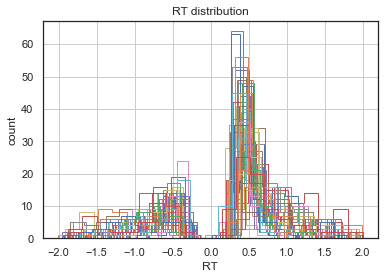

In [6]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel = 'RT', ylabel = 'count', title = 'RT distribution')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins = 20, histtype = 'step', ax = ax)
    
    plt.savefig('Reactions times All.pdf')

In [ ]:
from kabuki.analyze import gelman_rubin

models = []
for i in range (3):
    model8 = hddm.HDDM(data, depends_on = {'a': ['stim', 'reward'], 't': ['stim', 'reward'], 'v': ['stim', 'reward']}, p_outlier = 0.05, bias = False)
    model8.find_starting_values()
    model8.sample(20000, burn = 15000, dbname = 'traces.db', db = 'pickle')
    models.append(model8)
    
gelman_rubin(models)

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 20001 of 20000 complete in 23890.0 sec

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 20001 of 20000 complete in 23612.3 sec

C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------76%---------         ] 15395 of 20000 complete in 18173.9 sec

In [8]:
M8_concat = kabuki.utils.concat_models(models)

In [7]:
np.max(list(gelman_rubin(models).values()))

1.0315309783639046

In [9]:
M8_concat.print_stats()

                              mean         std       2.5q         25q        50q         75q       97.5q       mc err
a(CR.control)              1.16199   0.0483451    1.07085     1.12947    1.16217     1.19695      1.2569   0.00147952
a(CR.difficult)            1.04343   0.0482514   0.952745     1.01003    1.04286     1.07833     1.13759   0.00179866
a(CR.easy)                 1.03432   0.0519579   0.934149      1.0026    1.03478     1.06623     1.14469   0.00224948
a(NC.control)              1.35463   0.0557162    1.24689     1.31803    1.35498     1.39444     1.45837    0.0019894
a(NC.difficult)            1.25234   0.0585118    1.13333     1.21521     1.2534     1.29028     1.36828   0.00287404
a(NC.easy)                  1.1969   0.0666983    1.05853     1.15334    1.19942     1.24326     1.31849   0.00333664
a(NR.control)              1.53103   0.0449882    1.44877     1.49917    1.53168     1.55969     1.62669   0.00207233
a(NR.difficult)            1.44599   0.0409836    1.3643

Plotting a(CR.control)
Plotting a(CR.difficult)
Plotting a(CR.easy)
Plotting a(NC.control)
Plotting a(NC.difficult)
Plotting a(NC.easy)
Plotting a(NR.control)
Plotting a(NR.difficult)
Plotting a(NR.easy)
Plotting v(CR.control)
Plotting v(CR.difficult)
Plotting v(CR.easy)
Plotting v(NC.control)
Plotting v(NC.difficult)
Plotting v(NC.easy)
Plotting v(NR.control)
Plotting v(NR.difficult)
Plotting v(NR.easy)
Plotting t(CR.control)
Plotting t(CR.difficult)
Plotting t(CR.easy)


C:\Users\Hubsc\anaconda3\envs\RLDDM_env\lib\site-packages\pymc\Matplot.py:432: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(10, 6))


Plotting t(NC.control)
Plotting t(NC.difficult)
Plotting t(NC.easy)
Plotting t(NR.control)
Plotting t(NR.difficult)
Plotting t(NR.easy)


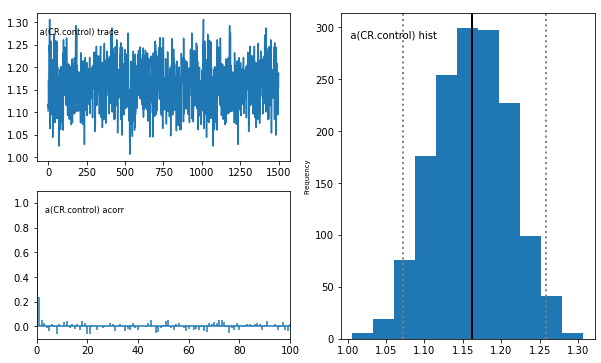

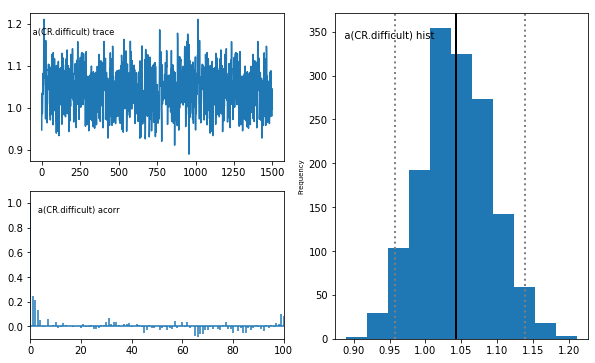

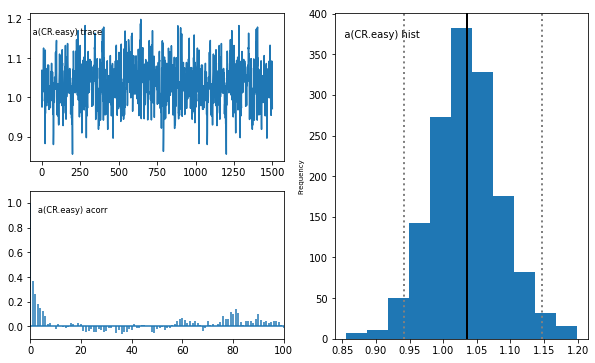

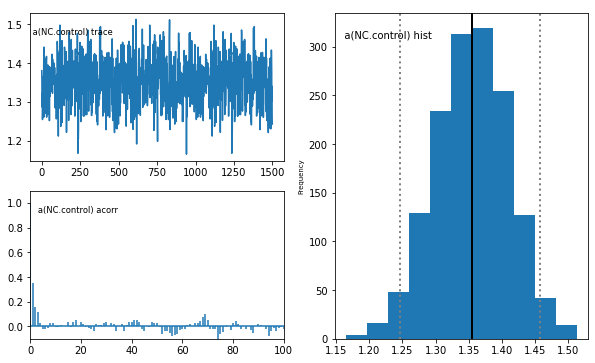

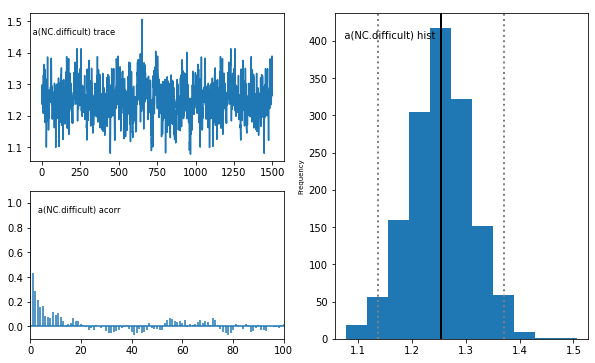

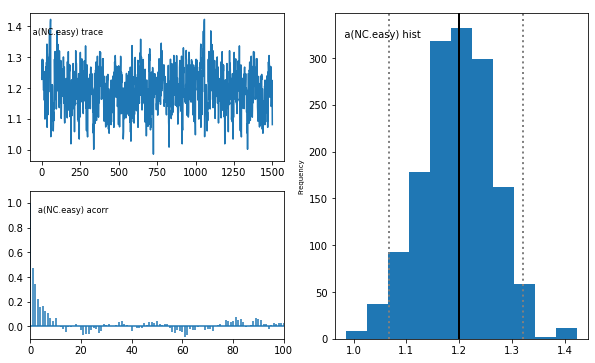

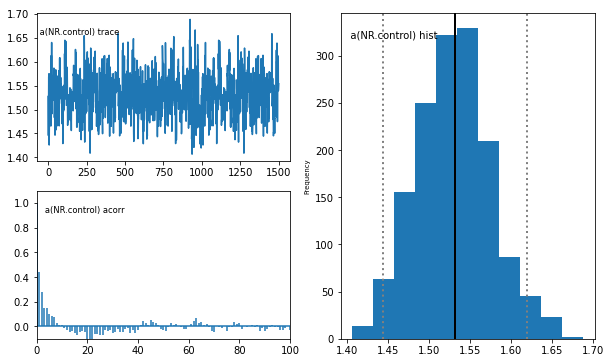

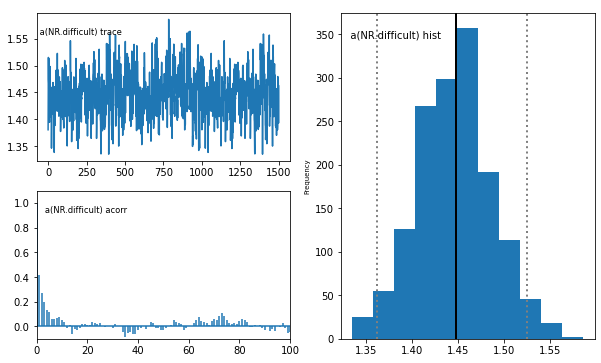

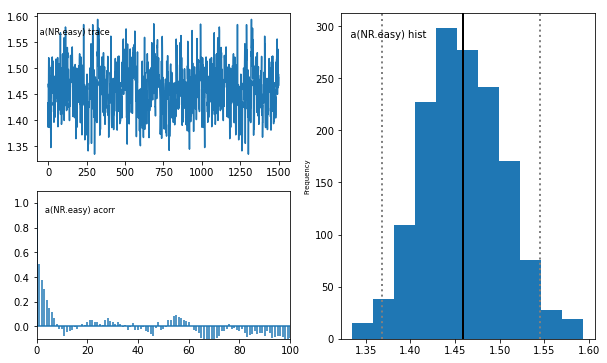

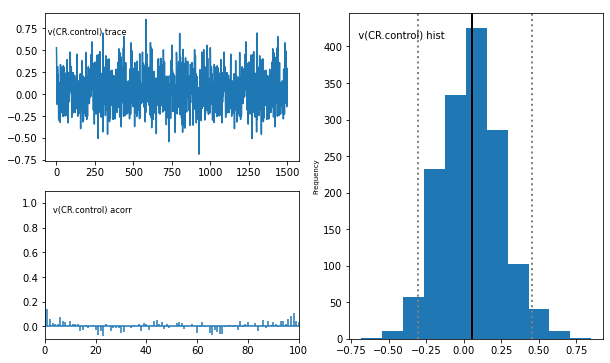

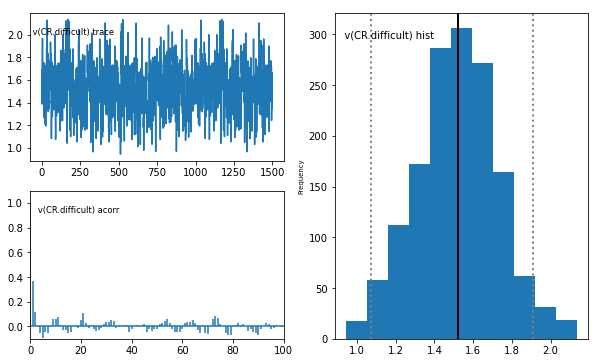

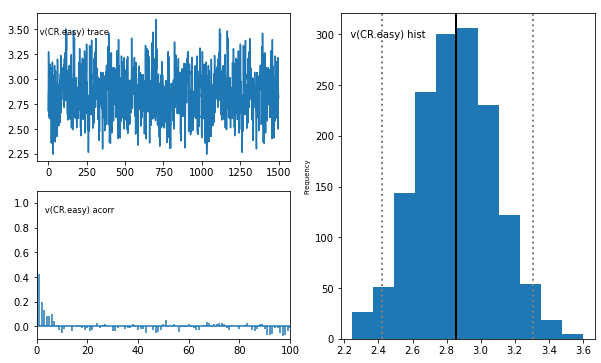

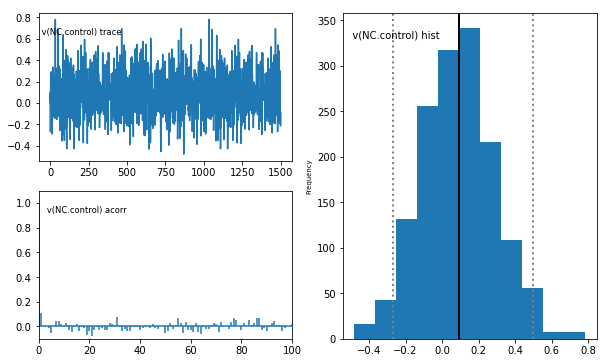

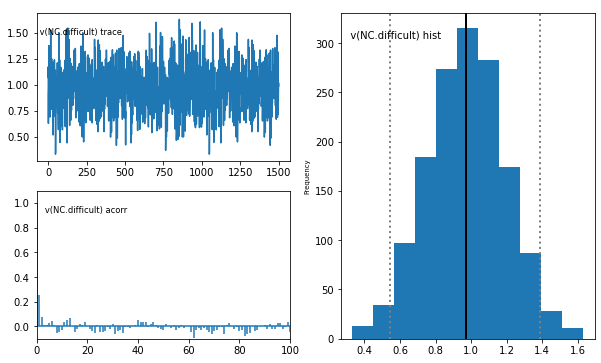

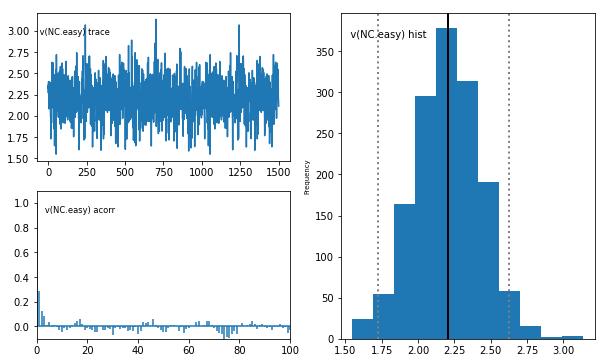

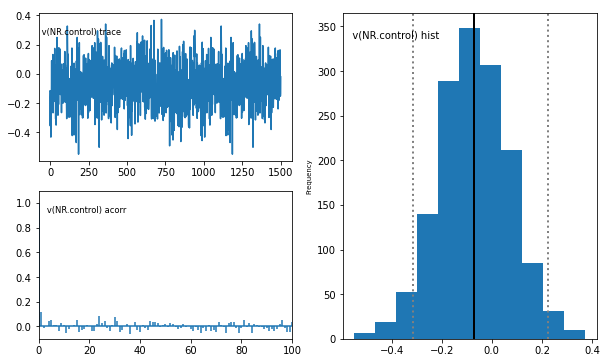

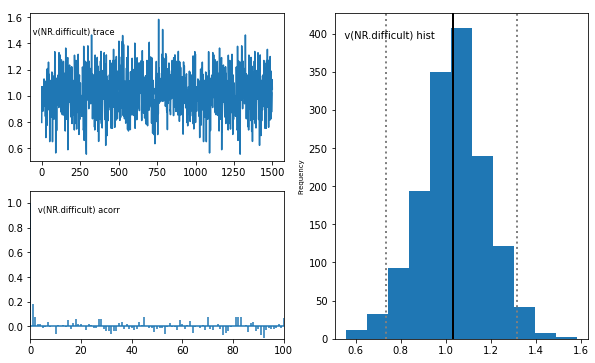

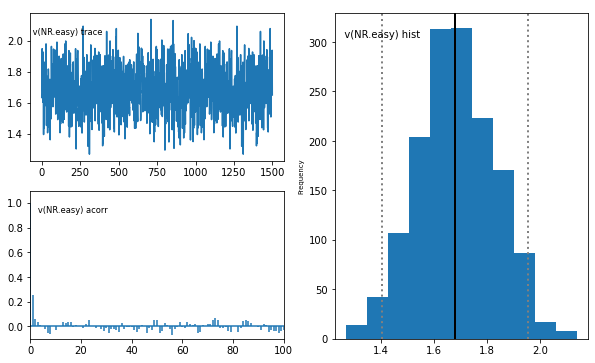

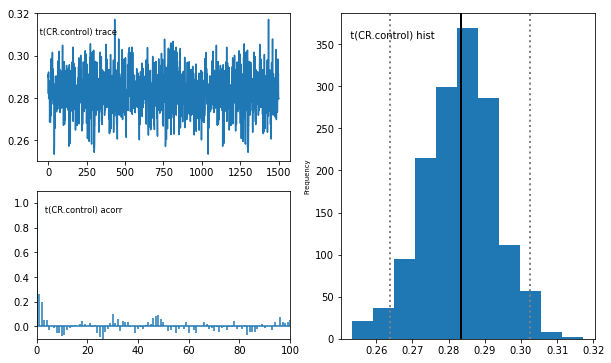

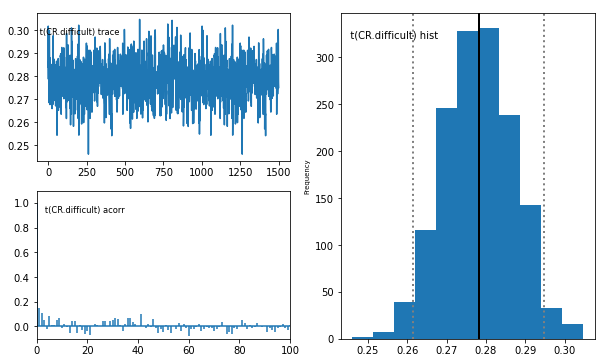

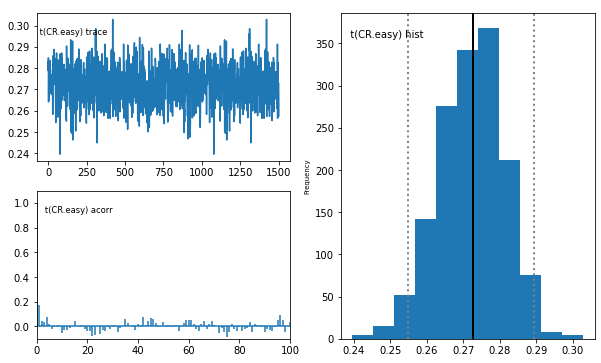

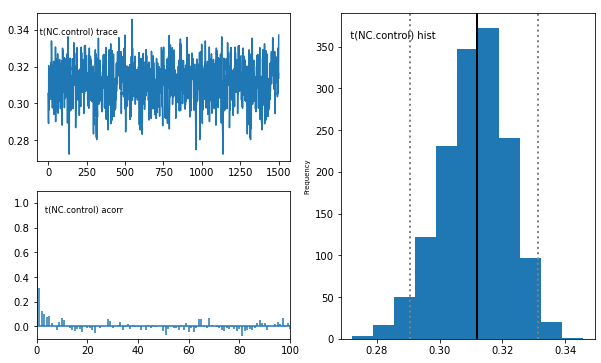

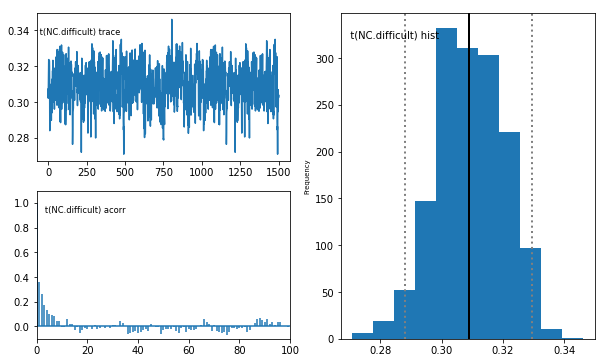

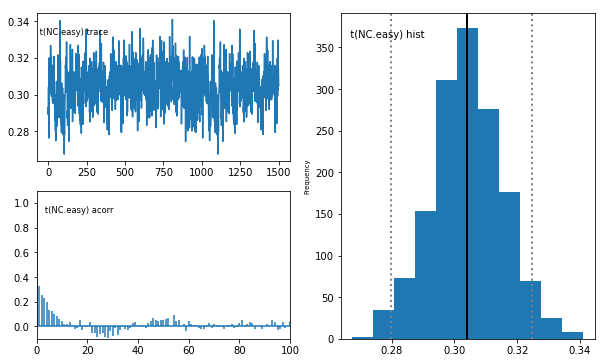

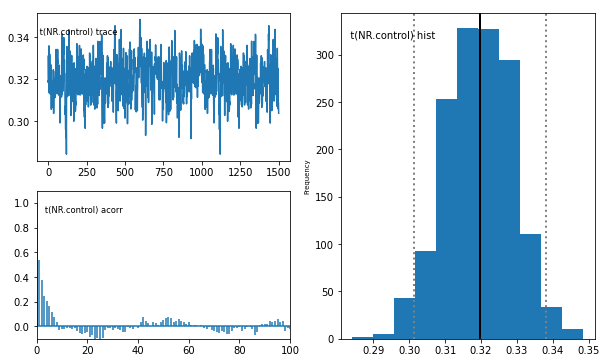

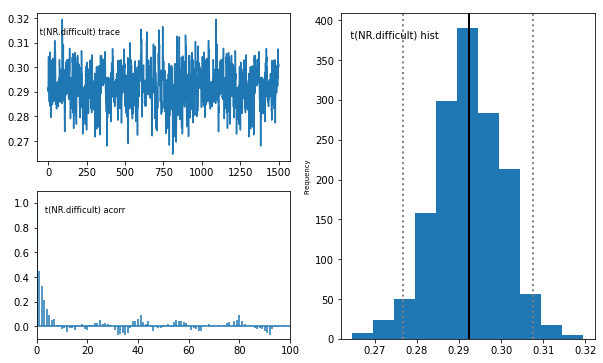

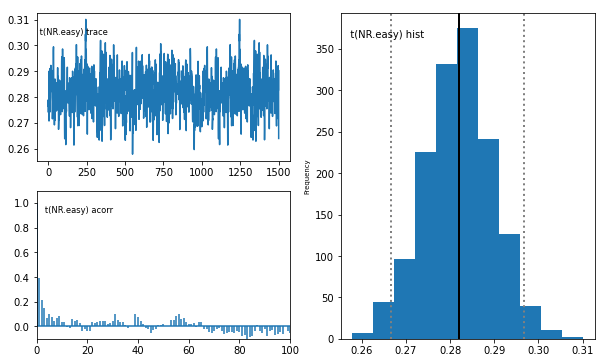

In [10]:
M8_concat.plot_posteriors(['a', 't', 'v'])

In [12]:
model_traces = M8_concat.get_traces()

In [ ]:
model_traces.to_csv(r'C:\Users\Hubsc\OneDrive\Desktop\DiscriminationStudy\M08_Draws.csv', index = False, header = True, sep = ';')

In [ ]:
# INFERENCE

In [ ]:
# MODEL NODES =================================================================================================================#
#Drift rates v
v_CRcontrol, v_CRdifficult, v_CReasy = M8_concat.nodes_db.node[['v(CR.control)', 'v(CR.difficult)', 'v(CR.easy)']]
v_NCcontrol, v_NCdifficult, v_NCeasy = M8_concat.nodes_db.node[['v(NC.control)', 'v(NC.difficult)', 'v(NC.easy)']]
v_NRcontrol, v_NRdifficult, v_NReasy = M8_concat.nodes_db.node[['v(NR.control)', 'v(NR.difficult)', 'v(NR.easy)']]

#Boundary separation a
a_CRcontrol, a_CRdifficult, a_CReasy = M8_concat.nodes_db.node[['a(CR.control)', 'a(CR.difficult)', 'a(CR.easy)']]
a_NCcontrol, a_NCdifficult, a_NCeasy = M8_concat.nodes_db.node[['a(NC.control)', 'a(NC.difficult)', 'a(NC.easy)']]
a_NRcontrol, a_NRdifficult, a_NReasy = M8_concat.nodes_db.node[['a(NR.control)', 'a(NR.difficult)', 'a(NR.easy)']]

#Non-decision times t
t_CRcontrol, t_CRdifficult, t_CReasy = M8_concat.nodes_db.node[['t(CR.control)', 't(CR.difficult)', 't(CR.easy)']]
t_NCcontrol, t_NCdifficult, t_NCeasy = M8_concat.nodes_db.node[['t(NC.control)', 't(NC.difficult)', 't(NC.easy)']]
t_NRcontrol, t_NRdifficult, t_NReasy = M8_concat.nodes_db.node[['t(NR.control)', 't(NR.difficult)', 't(NR.easy)']]

In [ ]:
# DIFFERENCE AMONGST PULSE CONDITIONS =========================================================================================#

In [ ]:
# DRIFT RATES -----------------------------------------------------------------------------------------------------------------#

In [ ]:
# In control trials (+0°C)

hddm.analyze.plot_posterior_nodes([v_CRcontrol, v_NCcontrol, v_NRcontrol])
plt.xlabel('Drift Rate')
plt.ylabel('Posterior Probability')
plt.title('Drift rates amongst control trials')    
plt.savefig('Model8_Drift_Rates_Control.pdf')  

In [ ]:
print ("Control Trials: P(V Contingent > V Non-Contingent)", (v_CRcontrol.trace() > v_NCcontrol.trace()).mean())
print ("Control Trials: P(V Contingent > V No-Reward)", (v_CRcontrol.trace() > v_NRcontrol.trace()).mean())
print ("Control Trials: P(V Non-Contingent > V No-Reward)", (v_NCcontrol.trace() > v_NRcontrol.trace()).mean())

In [ ]:
print ("Control Trials: P(V Contingent < V Non-Contingent)", (v_CRcontrol.trace() < v_NCcontrol.trace()).mean())
print ("Control Trials: P(V Contingent < V No-Reward)", (v_CRcontrol.trace() < v_NRcontrol.trace()).mean())
print ("Control Trials: P(V Non-Contingent < V No-Reward)", (v_NCcontrol.trace() < v_NRcontrol.trace()).mean())

In [ ]:
# In difficult trials (+0.2°C)

hddm.analyze.plot_posterior_nodes([v_CRdifficult, v_NCdifficult, v_NRdifficult])
plt.xlabel('Drift Rate')
plt.ylabel('Posterior Probability')
plt.title('Drift rates amongst difficult trials')
plt.savefig('Model8_Drift_Rates_Difficult.pdf')  

In [ ]:
print ("Difficult Trials: P(V Contingent > V Non-Contingent)", (v_CRdifficult.trace() > v_NCdifficult.trace()).mean())
print ("Difficult Trials: P(V Contingent > V No-Reward)", (v_CRdifficult.trace() > v_NRdifficult.trace()).mean())
print ("Difficult Trials: P(V Non-Contingent > V No-Reward)", (v_NCdifficult.trace() > v_NRdifficult.trace()).mean())

In [ ]:
print ("Difficult Trials: P(V Contingent < V Non-Contingent)", (v_CRdifficult.trace() < v_NCdifficult.trace()).mean())
print ("Difficult Trials: P(V Contingent < V No-Reward)", (v_CRdifficult.trace() < v_NRdifficult.trace()).mean())
print ("Difficult Trials: P(V Non-Contingent < V No-Reward)", (v_NCdifficult.trace() < v_NRdifficult.trace()).mean())

In [ ]:
#In easy trials (+0.4°C)

hddm.analyze.plot_posterior_nodes([v_CReasy, v_NCeasy, v_NReasy])
plt.xlabel('Drift Rate')
plt.ylabel('Posterior Probability')
plt.title('Drift rates amongst easy trials')
plt.savefig('Model8_Drift_Rates_Easy.pdf') 

In [ ]:
print ("Easy Trials: P(V Contingent > V Non-Contingent)", (v_CReasy.trace() > v_NCeasy.trace()).mean())
print ("Easy Trials: P(V Contingent > V No-Reward)", (v_CReasy.trace() > v_NReasy.trace()).mean())
print ("Easy Trials: P(V Non-Contingent > V No-Reward)", (v_NCeasy.trace() > v_NReasy.trace()).mean())

In [ ]:
print ("Easy Trials: P(V Contingent < V Non-Contingent)", (v_CReasy.trace() < v_NCeasy.trace()).mean())
print ("Easy Trials: P(V Contingent < V No-Reward)", (v_CReasy.trace() < v_NReasy.trace()).mean())
print ("Easy Trials: P(V Non-Contingent < V No-Reward)", (v_NCeasy.trace() < v_NReasy.trace()).mean())

In [ ]:
# BOUNDARY SEPARATIONS --------------------------------------------------------------------------------------------------------#

In [ ]:
# In control trials (+0°C)

hddm.analyze.plot_posterior_nodes([a_CRcontrol, a_NCcontrol, a_NRcontrol])
plt.xlabel('Boundary Separation')
plt.ylabel('Posterior Probability')
plt.title('Bounderies amongst control trials')
plt.savefig('Model8_Bounderies_Control.pdf') 

In [ ]:
print ("Control Trials: P(A Contingent > A Non-Contingent)", (a_CRcontrol.trace() > a_NCcontrol.trace()).mean())
print ("Control Trials: P(A Contingent > A No-Reward)", (a_CRcontrol.trace() > a_NRcontrol.trace()).mean())
print ("Control Trials: P(A Non-Contingent > A No-Reward)", (a_NCcontrol.trace() > a_NRcontrol.trace()).mean())

In [ ]:
print ("Control Trials: P(A Contingent < A Non-Contingent)", (a_CRcontrol.trace() < a_NCcontrol.trace()).mean())
print ("Control Trials: P(A Contingent < A No-Reward)", (a_CRcontrol.trace() < a_NRcontrol.trace()).mean())
print ("Control Trials: P(A Non-Contingent < A No-Reward)", (a_NCcontrol.trace() < a_NRcontrol.trace()).mean())

In [ ]:
# In difficult trials (+0.2°C)

hddm.analyze.plot_posterior_nodes([a_CRdifficult, a_NCdifficult, a_NRdifficult])
plt.xlabel('Boundary Separation')
plt.ylabel('Posterior Probability')
plt.title('Bounderies amongst difficult trials')
plt.savefig('Model8_Bounderies_Difficult.pdf') 

In [ ]:
print ("Difficult Trials: P(A Contingent > A Non-Contingent)", (a_CRdifficult.trace() > a_NCdifficult.trace()).mean())
print ("Difficult Trials: P(A Contingent > A No-Reward)", (a_CRdifficult.trace() > a_NRdifficult.trace()).mean())
print ("Difficult Trials: P(A Non-Contingent > A No-Reward)", (a_NCdifficult.trace() > a_NRdifficult.trace()).mean())

In [ ]:
print ("Difficult Trials: P(A Contingent < A Non-Contingent)", (a_CRdifficult.trace() < a_NCdifficult.trace()).mean())
print ("Difficult Trials: P(A Contingent < A No-Reward)", (a_CRdifficult.trace() < a_NRdifficult.trace()).mean())
print ("Difficult Trials: P(A Non-Contingent < A No-Reward)", (a_NCdifficult.trace() < a_NRdifficult.trace()).mean())

In [ ]:
# In easy trials (+0.4°C)

hddm.analyze.plot_posterior_nodes([a_CReasy, a_NCeasy, a_NReasy])
plt.xlabel('Boundary Separation')
plt.ylabel('Posterior Probability')
plt.title('Bounderies amongst easy trials')
plt.savefig('Model8_Bounderies_Easy.pdf') 

In [ ]:
print ("Easy Trials: P(A Contingent > A Non-Contingent)", (a_CReasy.trace() > a_NCeasy.trace()).mean())
print ("Easy Trials: P(A Contingent > A No-Reward)", (a_CReasy.trace() > a_NReasy.trace()).mean())
print ("Easy Trials: P(A Non-Contingent > A No-Reward)", (a_NCeasy.trace() > a_NReasy.trace()).mean())

In [ ]:
print ("Easy Trials: P(A Contingent < A Non-Contingent)", (a_CReasy.trace() < a_NCeasy.trace()).mean())
print ("Easy Trials: P(A Contingent < A No-Reward)", (a_CReasy.trace() < a_NReasy.trace()).mean())
print ("Easy Trials: P(A Non-Contingent < A No-Reward)", (a_NCeasy.trace() < a_NReasy.trace()).mean())

In [ ]:
# NON-DECISION TIMES ----------------------------------------------------------------------------------------------------------#

In [ ]:
# In control trials (+0°C)

hddm.analyze.plot_posterior_nodes([t_CRcontrol, t_NCcontrol, t_NRcontrol])
plt.xlabel('Non-Decision Times')
plt.ylabel('Posterior Probability')
plt.title('Non-decision times amongst control trials')
plt.savefig('Model8_TER_Control.pdf'

In [ ]:
print ("Control Trials: P(ter Contingent > ter Non-Contingent)", (t_CRcontrol.trace() > t_NCcontrol.trace()).mean())
print ("Control Trials: P(ter Contingent > ter No-Reward)", (t_CRcontrol.trace() > t_NRcontrol.trace()).mean())
print ("Control Trials: P(ter Non-Contingent > ter No-Reward)", (t_NCcontrol.trace() > t_NRcontrol.trace()).mean())

In [ ]:
print ("Control Trials: P(ter Contingent < ter Non-Contingent)", (t_CRcontrol.trace() < t_NCcontrol.trace()).mean())
print ("Control Trials: P(ter Contingent < ter No-Reward)", (t_CRcontrol.trace() < t_NRcontrol.trace()).mean())
print ("Control Trials: P(ter Non-Contingent < ter No-Reward)", (t_NCcontrol.trace() < t_NRcontrol.trace()).mean())

In [ ]:
# In difficult trials (+0.2°C)

hddm.analyze.plot_posterior_nodes([t_CRdifficult, t_NCdifficult, t_NRdifficult])
plt.xlabel('Non-Decision Times')
plt.ylabel('Posterior Probability')
plt.title('Non-decision times amongst difficult trials') 
plt.savefig('Model8_TER_Difficult.pdf') 

In [ ]:
print ("Difficult Trials: P(ter Contingent > ter Non-Contingent)", (t_CRdifficult.trace() > t_NCdifficult.trace()).mean())
print ("Difficult Trials: P(ter Contingent > ter No-Reward)", (t_CRdifficult.trace() > t_NRdifficult.trace()).mean())
print ("Difficult Trials: P(ter Non-Contingent > ter No-Reward)", (t_NCdifficult.trace() > t_NRdifficult.trace()).mean())

In [ ]:
print ("Difficult Trials: P(ter Contingent < ter Non-Contingent)", (t_CRdifficult.trace() < t_NCdifficult.trace()).mean())
print ("Difficult Trials: P(ter Contingent < ter No-Reward)", (t_CRdifficult.trace() < t_NRdifficult.trace()).mean())
print ("Difficult Trials: P(ter Non-Contingent < ter No-Reward)", (t_NCdifficult.trace() < t_NRdifficult.trace()).mean())

In [ ]:
# In easy trials (+0.4°C)

hddm.analyze.plot_posterior_nodes([t_CReasy, t_NCeasy, t_NReasy])
plt.xlabel('Non-Decision Times')
plt.ylabel('Posterior Probability')
plt.title('Non-decision times amongst easy trials')
plt.savefig('Model8_TER_Easy.pdf') 

In [ ]:
print ("Easy Trials: P(ter Contingent > ter Non-Contingent)", (t_CReasy.trace() > t_NCeasy.trace()).mean())
print ("Easy Trials: P(ter Contingent > ter No-Reward)", (t_CReasy.trace() > t_NReasy.trace()).mean())
print ("Easy Trials: P(ter Non-Contingent > ter No-Reward)", (t_NCeasy.trace() > t_NReasy.trace()).mean())

In [ ]:
print ("Easy Trials: P(ter Contingent < ter Non-Contingent)", (t_CReasy.trace() < t_NCeasy.trace()).mean())
print ("Easy Trials: P(ter Contingent < ter No-Reward)", (t_CReasy.trace() < t_NReasy.trace()).mean())
print ("Easy Trials: P(ter Non-Contingent < ter No-Reward)", (t_NCeasy.trace() < t_NReasy.trace()).mean())

In [ ]:
# DIFFERENCE AMONGST PULSE CONDITIONS =========================================================================================#

In [ ]:
# DRIFT RATES -----------------------------------------------------------------------------------------------------------------#

In [ ]:
# In no reward trials

hddm.analyze.plot_posterior_nodes([v_NRcontrol, v_NRdifficult, v_NReasy])
plt.xlabel('Drift Rate')
plt.ylabel('Posterior Probability')
plt.title('Drift rates amongst No Reward trials')    
plt.savefig('Model8_Drift_Rates_NoReward.pdf') 

In [ ]:
print ("No-Reward Trials: P(V Control > V Easy)", (v_NRcontrol.trace() > v_NReasy.trace()).mean())
print ("No-Reward Trials: P(V Control > V Difficult)", (v_NRcontrol.trace() > v_NRdifficult.trace()).mean())
print ("No-Reward Trials: P(V Easy > V Difficult)", (v_NReasy.trace() > v_NRdifficult.trace()).mean())

In [ ]:
print ("No-Reward Trials: P(V Control < V Easy)", (v_NRcontrol.trace() < v_NReasy.trace()).mean())
print ("No-Reward Trials: P(V Control < V Difficult)", (v_NRcontrol.trace() < v_NRdifficult.trace()).mean())
print ("No-Reward Trials: P(V Easy < V Difficult)", (v_NReasy.trace() < v_NRdifficult.trace()).mean())

In [ ]:
# In contingent trials

hddm.analyze.plot_posterior_nodes([v_CRcontrol, v_CRdifficult, v_CReasy])
plt.xlabel('Drift Rate')
plt.ylabel('Posterior Probability')
plt.title('Drift rates amongst contingent trials')    
plt.savefig('Model8_Drift_Rates_Contingent.pdf') 

In [ ]:
print ("Contingent Trials: P(V Control > V Easy)", (v_CRcontrol.trace() > v_CReasy.trace()).mean())
print ("Contingent Trials: P(V Control > V Difficult)", (v_CRcontrol.trace() > v_CRdifficult.trace()).mean())
print ("Contingent Trials: P(V Easy > V Difficult)", (v_CReasy.trace() > v_CRdifficult.trace()).mean())

In [ ]:
print ("Contingent Trials: P(V Control < V Easy)", (v_CRcontrol.trace() < v_CReasy.trace()).mean())
print ("Contingent Trials: P(V Control < V Difficult)", (v_CRcontrol.trace() < v_CRdifficult.trace()).mean())
print ("Contingent Trials: P(V Easy < V Difficult)", (v_CReasy.trace() < v_CRdifficult.trace()).mean())

In [ ]:
# In non-contingent trials

hddm.analyze.plot_posterior_nodes([v_NCcontrol, v_NCdifficult, v_NCeasy])
plt.xlabel('Drift Rate')
plt.ylabel('Posterior Probability')
plt.title('Drift rates amongst non-contingent trials')    
plt.savefig('Model8_Drift_Rates_NonContingent.pdf')   

In [ ]:
print ("Non-Contingent Trials: P(V Control > V Easy)", (v_NCcontrol.trace() > v_NCeasy.trace()).mean())
print ("Non-Contingent Trials: P(V Control > V Difficult)", (v_NCcontrol.trace() > v_NCdifficult.trace()).mean())
print ("Non-Contingent Trials: P(V Easy > V Difficult)", (v_NCeasy.trace() > v_NCdifficult.trace()).mean())

In [ ]:
print ("Non-Contingent Trials: P(V Control < V Easy)", (v_NCcontrol.trace() < v_NCeasy.trace()).mean())
print ("Non-Contingent Trials: P(V Control < V Difficult)", (v_NCcontrol.trace() < v_NCdifficult.trace()).mean())
print ("Non-Contingent Trials: P(V Easy < V Difficult)", (v_NCeasy.trace() < v_NCdifficult.trace()).mean())

In [ ]:
# BOUNDARY SEPARATIONS --------------------------------------------------------------------------------------------------------#

In [ ]:
# In no reward trials

hddm.analyze.plot_posterior_nodes([a_NRcontrol, a_NRdifficult, a_NReasy])
plt.xlabel('Boundary separation')
plt.ylabel('Posterior Probability')
plt.title('Boundary separations amongst No Reward trials')    
plt.savefig('Model8_Bounderies_NoReward.pdf')  

In [ ]:
print ("No-Reward Trials: P(A Control > A Easy)", (a_NRcontrol.trace() > a_NReasy.trace()).mean())
print ("No-Reward Trials: P(A Control > A Difficult)", (a_NRcontrol.trace() > a_NRdifficult.trace()).mean())
print ("No-Reward Trials: P(A Easy > A Difficult)", (a_NReasy.trace() > a_NRdifficult.trace()).mean())

In [ ]:
print ("No-Reward Trials: P(A Control < A Easy)", (a_NRcontrol.trace() < a_NReasy.trace()).mean())
print ("No-Reward Trials: P(A Control < A Difficult)", (a_NRcontrol.trace() < a_NRdifficult.trace()).mean())
print ("No-Reward Trials: P(A Easy < A Difficult)", (a_NReasy.trace() < a_NRdifficult.trace()).mean())

In [ ]:
# In contingent trials

hddm.analyze.plot_posterior_nodes([a_CRcontrol, a_CRdifficult, a_CReasy])
plt.xlabel('Boundary separation')
plt.ylabel('Posterior Probability')
plt.title('Boundary separations amongst contingent trials')    
plt.savefig('Model8_Bounderies_Contingent.pdf')  

In [ ]:
print ("Contingent Trials: P(A Control > A Easy)", (a_CRcontrol.trace() > a_CReasy.trace()).mean())
print ("Contingent Trials: P(A Control > A Difficult)", (a_CRcontrol.trace() > a_CRdifficult.trace()).mean())
print ("Contingent Trials: P(A Easy > A Difficult)", (a_CReasy.trace() > a_CRdifficult.trace()).mean())

In [ ]:
print ("Contingent Trials: P(A Control < A Easy)", (a_CRcontrol.trace() < a_CReasy.trace()).mean())
print ("Contingent Trials: P(A Control < A Difficult)", (a_CRcontrol.trace() < a_CRdifficult.trace()).mean())
print ("Contingent Trials: P(A Easy < A Difficult)", (a_CReasy.trace() < a_CRdifficult.trace()).mean())

In [ ]:
# In non-contingent trials

hddm.analyze.plot_posterior_nodes([a_NCcontrol, a_NCdifficult, a_NCeasy])
plt.xlabel('Boundary separation')
plt.ylabel('Posterior Probability')
plt.title('Boundary separations amongst non-contingent trials')    
plt.savefig('Model8_Bounderies_NonContingent.pdf')  

In [ ]:
print ("Non-contingent Trials: P(A Control > A Easy)", (a_NCcontrol.trace() > a_NCeasy.trace()).mean())
print ("Non-contingent Trials: P(A Control > A Difficult)", (a_NCcontrol.trace() > a_NCdifficult.trace()).mean())
print ("Non-contingent Trials: P(A Easy > A Difficult)", (a_NCeasy.trace() > a_NCdifficult.trace()).mean())

In [ ]:
print ("Non-contingent Trials: P(A Control < A Easy)", (a_NCcontrol.trace() < a_NCeasy.trace()).mean())
print ("Non-contingent Trials: P(A Control < A Difficult)", (a_NCcontrol.trace() < a_NCdifficult.trace()).mean())
print ("Non-contingent Trials: P(A Easy < A Difficult)", (a_NCeasy.trace() < a_NCdifficult.trace()).mean())

In [ ]:
# NON-DECISION TIMES ----------------------------------------------------------------------------------------------------------#

In [ ]:
# In no rewards trials

hddm.analyze.plot_posterior_nodes([t_NRcontrol, t_NRdifficult, t_NReasy])
plt.xlabel('Non Decision times')
plt.ylabel('Posterior Probability')
plt.title('Non-decision times amongst No Reward trials')    
plt.savefig('Model8_Ters_NoReward.pdf')  

In [ ]:
print ("No-Reward Trials: P(T Control > T Easy)", (t_NRcontrol.trace() > t_NReasy.trace()).mean())
print ("No-Reward Trials: P(T Control > T Difficult)", (t_NRcontrol.trace() > t_NRdifficult.trace()).mean())
print ("No-Reward Trials: P(T Easy > T Difficult)", (t_NReasy.trace() > t_NRdifficult.trace()).mean())

In [ ]:
print ("No-Reward Trials: P(T Control < T Easy)", (t_NRcontrol.trace() < t_NReasy.trace()).mean())
print ("No-Reward Trials: P(T Control < T Difficult)", (t_NRcontrol.trace() < t_NRdifficult.trace()).mean())
print ("No-Reward Trials: P(T Easy < T Difficult)", (t_NReasy.trace() < t_NRdifficult.trace()).mean())

In [ ]:
# In contingent trials

hddm.analyze.plot_posterior_nodes([t_CRcontrol, t_CRdifficult, t_CReasy])
plt.xlabel('Non Decision times')
plt.ylabel('Posterior Probability')
plt.title('Non-decision times amongst Contingent trials')    
plt.savefig('Model8_Ters_Contingent.pdf')

In [ ]:
print ("Contingent Trials: P(T Control > T Easy)", (t_CRcontrol.trace() > t_CReasy.trace()).mean())
print ("Contingent Trials: P(T Control > T Difficult)", (t_CRcontrol.trace() > t_CRdifficult.trace()).mean())
print ("Contingent Trials: P(T Easy > T Difficult)", (t_CReasy.trace() > t_CRdifficult.trace()).mean())

In [ ]:
print ("Contingent Trials: P(T Control < T Easy)", (t_CRcontrol.trace() < t_CReasy.trace()).mean())
print ("Contingent Trials: P(T Control < T Difficult)", (t_CRcontrol.trace() < t_CRdifficult.trace()).mean())
print ("Contingent Trials: P(T Easy < T Difficult)", (t_CReasy.trace() < t_CRdifficult.trace()).mean())

In [ ]:
# In non-contingent trials

hddm.analyze.plot_posterior_nodes([t_NCcontrol, t_NCdifficult, t_NCeasy])
plt.xlabel('Non Decision times')
plt.ylabel('Posterior Probability')
plt.title('Non-decision times amongst Non Contingent') 
plt.savefig('Model8_Ters_NonContingent.pdf')

In [ ]:
print ("Non-contingent Trials: P(T Control > T Easy)", (t_NCcontrol.trace() > t_NCeasy.trace()).mean())
print ("Non-contingent Trials: P(T Control > T Difficult)", (t_NCcontrol.trace() > t_NCdifficult.trace()).mean())
print ("Non-contingent Trials: P(T Easy > T Difficult)", (t_NCeasy.trace() > t_NCdifficult.trace()).mean())

In [ ]:
print ("Non-contingent Trials: P(T Control < T Easy)", (t_NCcontrol.trace() < t_NCeasy.trace()).mean())
print ("Non-contingent Trials: P(T Control < T Difficult)", (t_NCcontrol.trace() < t_NCdifficult.trace()).mean())
print ("Non-contingent Trials: P(T Easy < T Difficult)", (t_NCeasy.trace() < t_NCdifficult.trace()).mean())